In [ ]:
!pip install tensorflow pandas scikit-learn numpy

import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import files
uploaded = files.upload()  # upload dataset.json

df = pd.read_json('dataset.json')
print("Jumlah data:", len(df))
df.head()


Saving dataset.json to dataset (1).json
Jumlah data: 772


,nama,kategori,kabupaten_kota,rating,preferensi,link_lokasi,latitude,longitude,link_gambar
0,Taman Mumbul Sangeh,Alam,Kabupaten Badung,4.6,Wisata Alam,https://www.google.com/maps/place/Taman+Mumbul...,-8.483959,115.212288,https://lh3.googleusercontent.com/p/AF1QipPniB...
1,Sangeh Monkey Forest,Alam,Kabupaten Badung,4.6,Wisata Alam,https://www.google.com/maps/place/Sangeh+Monke...,-8.481774,115.206739,https://lh3.googleusercontent.com/p/AF1QipN2_T...
2,Objek Wisata Sangeh,Umum,Kabupaten Badung,4.6,Wisata Umum,https://www.google.com/maps/place/Objek+Wisata...,-8.481566,115.206546,https://lh3.googleusercontent.com/p/AF1QipO1t7...
3,Satria Gatotkaca Park,Umum,Kabupaten Badung,4.6,Wisata Umum,https://www.google.com/maps/place/Satria+Gatot...,-8.744388,115.178867,https://lh3.googleusercontent.com/p/AF1QipP3kd...
4,Desa Wisata Penarungan,Umum,Kabupaten Badung,5.0,Wisata Umum,https://www.google.com/maps/place/Desa+Wisata+...,-8.539637,115.198893,https://lh3.googleusercontent.com/p/AF1QipO-JZ...


In [ ]:
df = df.dropna(subset=['kategori', 'preferensi', 'rating'])

# Encode kategori, preferensi, kabupaten
le_kategori = LabelEncoder()
le_preferensi = LabelEncoder()
le_kabupaten = LabelEncoder()

df['kategori_enc'] = le_kategori.fit_transform(df['kategori'])
df['preferensi_enc'] = le_preferensi.fit_transform(df['preferensi'])
df['kabupaten_enc'] = le_kabupaten.fit_transform(df['kabupaten_kota'])

# Normalisasi rating
scaler = MinMaxScaler()
df['rating_norm'] = scaler.fit_transform(df[['rating']])

df[['nama', 'kategori', 'preferensi', 'rating', 'rating_norm']].head()


,nama,kategori,preferensi,rating,rating_norm
0,Taman Mumbul Sangeh,Alam,Wisata Alam,4.6,0.8
1,Sangeh Monkey Forest,Alam,Wisata Alam,4.6,0.8
2,Objek Wisata Sangeh,Umum,Wisata Umum,4.6,0.8
3,Satria Gatotkaca Park,Umum,Wisata Umum,4.6,0.8
4,Desa Wisata Penarungan,Umum,Wisata Umum,5.0,1.0


In [ ]:
# Fitur: kategori, preferensi, kabupaten, rating
X = df[['kategori_enc', 'preferensi_enc', 'kabupaten_enc', 'rating_norm']].values

# Label = rating_norm (bisa juga cluster, tapi di sini rating target prediksi)
y = df['rating_norm'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(4,)),  # 4 fitur input
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # output rating normalized
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=16,
    verbose=1
)


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0325 - mae: 0.1412 - val_loss: 0.0236 - val_mae: 0.1176
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0224 - mae: 0.1153 - val_loss: 0.0192 - val_mae: 0.1064
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0187 - mae: 0.1061 - val_loss: 0.0152 - val_mae: 0.0951
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0169 - mae: 0.0916 - val_loss: 0.0137 - val_mae: 0.0912
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0152 - mae: 0.0956 - val_loss: 0.0127 - val_mae: 0.0880
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0154 - mae: 0.0888 - val_loss: 0.0131 - val_mae: 0.0912
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mae: 0.0910 - val_loss: 0.0119 - val_mae: 0.0859
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0138 - mae: 0.0890 - val_loss: 0.0117 - val_mae: 0.0857
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0133 - mae: 

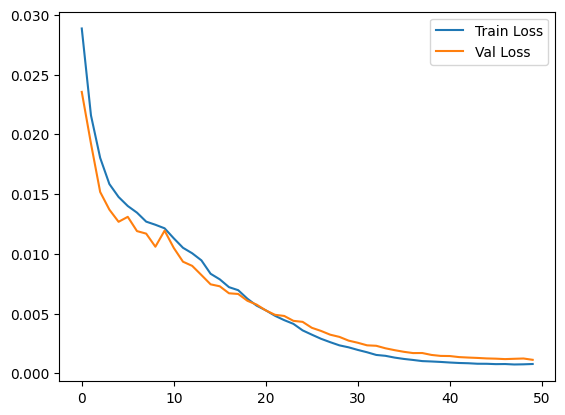

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.8491e-04 - mae: 0.0209 
Test MAE: 0.0223


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.4f}")


In [ ]:
# --- Evaluasi tambahan: hitung akurasi setara berdasarkan MAE ---
# Asumsikan rating asli 1–5
rating_min = 1
rating_max = 5
rating_range = rating_max - rating_min

# MAE sudah dihitung sebelumnya dari test set
mae_value = 0.0223  # atau bisa ganti dengan variabel hasil evaluasi: mae

# Konversi MAE ke skala rating asli
mae_real = mae_value * rating_range

# Hitung akurasi ekuivalen (semakin kecil error, semakin tinggi akurasi)
accuracy = (1 - mae_value) * 100

print(f"\n📊 Evaluasi Model:")
print(f"MAE (normalisasi)  : {mae_value:.4f}")
print(f"MAE (skala rating) : {mae_real:.4f} (≈ {mae_real:.2f} poin rating)")
print(f"Perkiraan Akurasi  : {accuracy:.2f}%")



📊 Evaluasi Model:
MAE (normalisasi)  : 0.0223
MAE (skala rating) : 0.0892 (≈ 0.09 poin rating)
Perkiraan Akurasi  : 97.77%


In [ ]:
# Simpan model Keras
model.save("bali_tourism_recommender.h5")

# Konversi ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("bali_tourism_recommender.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ Model berhasil dikonversi ke TFLite!")


Saved artifact at '/tmp/tmp_f4cx7lt'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  138950196768272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138950196770192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138950196767696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138950196766928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138950196770768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138950196768464: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Model berhasil dikonversi ke TFLite!


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras

# Registrasi ulang fungsi 'mse' agar dikenali Keras saat load model .h5
keras.utils.get_custom_objects()['mse'] = tf.keras.losses.MeanSquaredError()

# Sekarang baru load model
model_keras = keras.models.load_model("bali_tourism_recommender.h5")
df = pd.read_json("dataset.json")

# === 2️⃣ Encoding sama seperti saat training ===
from sklearn.preprocessing import LabelEncoder

kategori_enc = LabelEncoder()
preferensi_enc = LabelEncoder()
kabupaten_enc = LabelEncoder()

df['kategori_enc'] = kategori_enc.fit_transform(df['kategori'])
df['preferensi_enc'] = preferensi_enc.fit_transform(df['preferensi'])
df['kabupaten_enc'] = kabupaten_enc.fit_transform(df['kabupaten_kota'])
df['rating_norm'] = (df['rating'] - 1) / 4  # normalisasi 1–5 ke 0–1

# === 3️⃣ Ambil beberapa sampel untuk pengujian ===
sample_df = df.sample(10, random_state=42).reset_index(drop=True)
X_sample = sample_df[['kategori_enc', 'preferensi_enc', 'kabupaten_enc', 'rating_norm']].values.astype(np.float32)

# === 4️⃣ Prediksi pakai model Keras (asli) ===
keras_preds = model_keras.predict(X_sample)

# === 5️⃣ Load model TFLite ===
interpreter = tf.lite.Interpreter(model_path="bali_tourism_recommender.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# === 6️⃣ Prediksi pakai model TFLite ===
tflite_preds = []
for x in X_sample:
    input_data = np.expand_dims(x, axis=0).astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    pred = interpreter.get_tensor(output_details[0]['index'])[0][0]
    tflite_preds.append(pred)
tflite_preds = np.array(tflite_preds)

# === 7️⃣ Bandingkan hasil Keras vs TFLite ===
comparison = pd.DataFrame({
    "Nama": sample_df["nama"],
    "Kabupaten": sample_df["kabupaten_kota"],
    "Rating": sample_df["rating"],
    "Pred_Keras": keras_preds.flatten(),
    "Pred_TFLite": tflite_preds,
    "Selisih": np.abs(keras_preds.flatten() - tflite_preds)
})

print("\n🔍 Perbandingan hasil model:")
print(comparison)

print(f"\n📊 Rata-rata selisih prediksi: {comparison['Selisih'].mean():.6f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step

🔍 Perbandingan hasil model:
                          Nama             Kabupaten  Rating  Pred_Keras  \
0                    Kali Unda   Kabupaten Klungkung     4.5    0.852966   
1             Taman Bung Karno    Kabupaten Buleleng     4.6    0.867668   
2           Wisata Gelar River    Kabupaten Jembrana     4.6    0.885283   
3                  Taman Ujung  Kabupaten Karangasem     4.6    0.867726   
4       pantai Diamond pelilit   Kabupaten Klungkung     4.6    0.868173   
5   Waterfall Bangkiang Djaran      Kabupaten Bangli     4.7    0.861101   
6  Kantor Wisata Dukuh Lestari  Kabupaten Karangasem     4.9    0.921385   
7      Abian Desa Rice Terrace     Kabupaten Gianyar     4.4    0.840225   
8      Belimbing Rice Terraces     Kabupaten Tabanan     4.6    0.870955   
9          Leke Leke Waterfall     Kabupaten Tabanan     4.5    0.856650   

   Pred_TFLite       Selisih  
0     0.852966  0.000000e+00  
1     0.867668  5.960464e-08  
2 

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
